<a href="https://colab.research.google.com/github/neuroqudit/pyngn/blob/main/notebooks/01_lif_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. LIF Neuron Dynamics

This notebook demonstrates the dynamics of the Leaky Integrate-and-Fire (LIF) neuron implemented in `pyngn`.

## Neural Dynamics (LIF)

The reservoir evolution is governed by the **Leaky Integrate-and-Fire (LIF)** model.

### Differential Equation
For each neuron $i$:
$$ \tau_m \frac{du_i(t)}{dt} = -(u_i(t) - u_{rest}) + R \cdot I_{total}(i, t) $$

### Spiking Mechanism
$$ s_i(t) = 1 \quad \text{if } u_i(t) \geq \theta_{thresh} $$
After spiking, $u_i(t) \leftarrow u_{reset}$.

### Pentasynaptic Current
The total current integrates contributions from all agents:
$$ I_{total}(i, t) = I_{ext}(i, t) + \gamma_i(t) \cdot \sum_{j} M_{ij}(t) \cdot w_{ij} \cdot s_j(t - D_{ij}(t)) $$
*   $\gamma_i$: Astrocyte Gain
*   $M_{ij}$: Microglia Mask
*   $D_{ij}$: Oligodendrocyte Delay

In [1]:
!pip install pyngn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.5 MB/s eta 0:00:00


In [2]:
import torch
import matplotlib.pyplot as plt
from pyngn.neuron import LIFLayer

%matplotlib inline

## Setup Neuron Layer

We create a layer of 5 neurons with different input currents.

In [3]:
n_neurons = 5
dt = 1.0
tau_m = 20.0
v_th = 1.0

layer = LIFLayer(n_neurons=n_neurons, tau_m=tau_m, v_th=v_th, dt=dt)

# Input currents for each neuron
currents = torch.tensor([0.5, 0.9, 1.1, 1.5, 2.0])

## Simulation Loop

In [4]:
duration = 200
voltage_trace = []
spike_trace = []

layer.reset_state()

for t in range(duration):
    # Constant current injection
    s = layer.forward(i_syn=currents)

    voltage_trace.append(layer.v.clone().numpy())
    spike_trace.append(s.clone().numpy())

import numpy as np
voltage_trace = np.array(voltage_trace)
spike_trace = np.array(spike_trace)

## Visualization

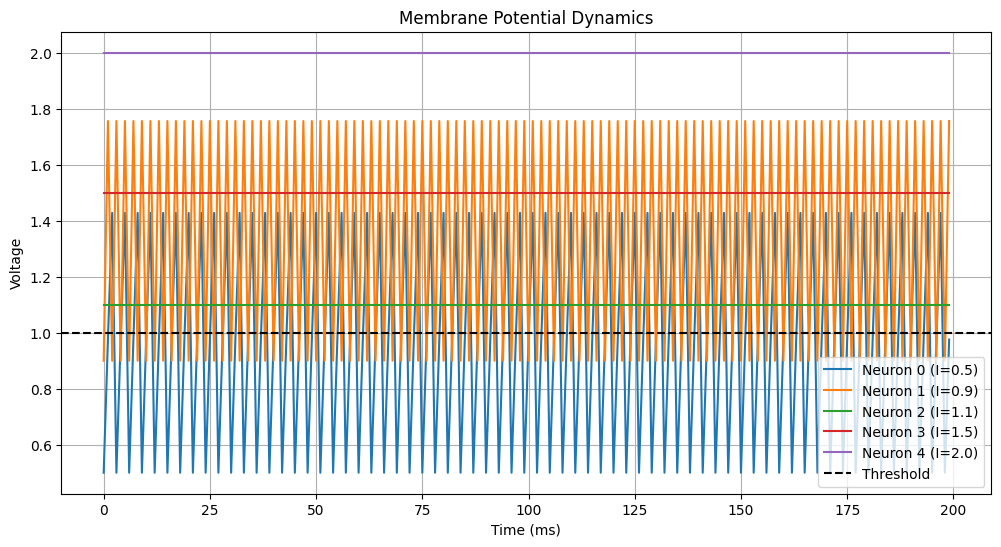

In [5]:
plt.figure(figsize=(12, 6))
for i in range(n_neurons):
    plt.plot(voltage_trace[:, i], label=f'Neuron {i} (I={currents[i].item():.1f})')

plt.axhline(v_th, color='k', linestyle='--', label='Threshold')
plt.title('Membrane Potential Dynamics')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)
plt.show()

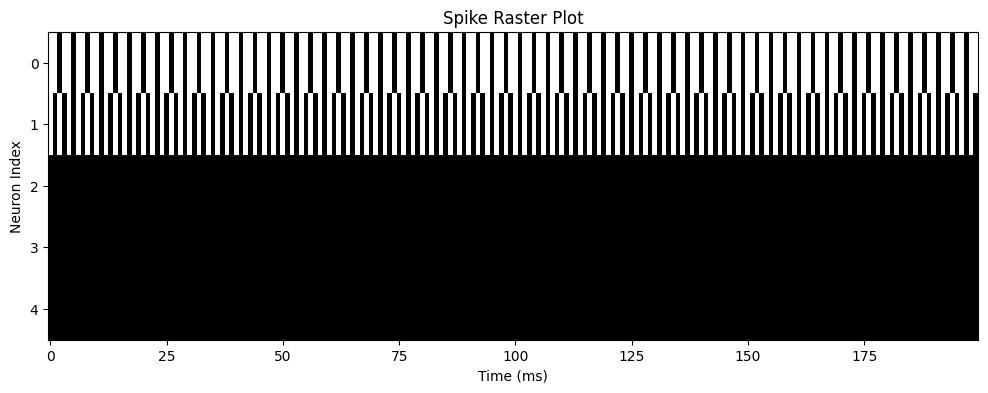

In [6]:
plt.figure(figsize=(12, 4))
plt.imshow(spike_trace.T, aspect='auto', cmap='Greys', interpolation='nearest')
plt.title('Spike Raster Plot')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.yticks(range(n_neurons))
plt.show()